In [ ]:
#Group 3. Miniproject 3. Oct 21 2020.

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Visualization Setup
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = (15,15)

In [4]:
#load the data

names=['Pregnancies', 'Glucose', 'BloodPressure', 
       'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Class']

df = pd.read_csv('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv', skiprows=9, header=None, names=names)

In [5]:
# Remove missing values
df = df[df['Glucose'] != 0]
df = df[df['BloodPressure'] != 0]
df = df[df['SkinThickness'] != 0]
df = df[df['Insulin'] != 0]
df = df[df['BMI'] != 0]
df = df[df['Age'] != 0]

In [7]:
#changing the dataframe to numpy array and assigning X and y
data = df.values

y = data[:, -1] # all the rows and the last column
x = data[:, :-1] # all the rows and all the columns except the last

#Split Data 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=3)

#Create Scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
# Initializing a model

model = SVC(kernel='rbf', gamma='auto', class_weight='balanced', random_state=3)

In [10]:
# Training the model

model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Accuracy:  0.7468354430379747


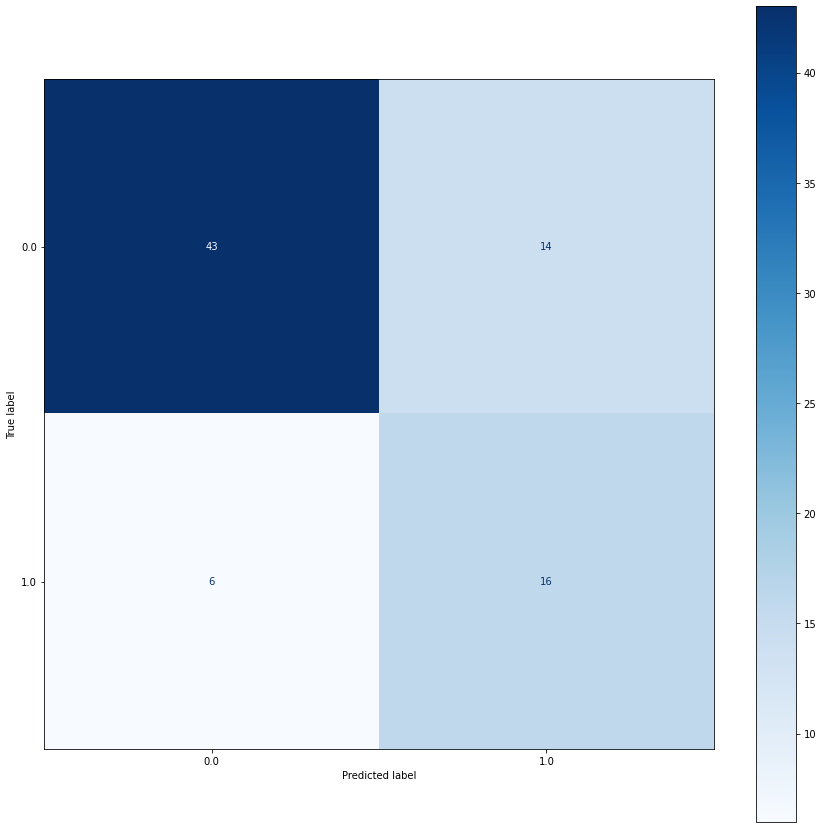

In [11]:
#Confusion Matrix
plot_confusion_matrix(model,x_test,y_test, cmap=plt.cm.Blues)

In [12]:
# Create Scaler for Cross Validation
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


In [35]:
# Cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

y_prob_cv = np.zeros(y.shape)
y_hat_cv = np.zeros(y.shape)



for train, test in kfold.split(x,y):    
    model_cv = SVC(kernel='rbf', gamma="auto" ,probability=True, class_weight='balanced', random_state=3)
    
    model_cv.fit(x[train], y[train])
    y_hat_cv[test] = model_cv.predict(x[test])
    y_prob_cv[test] = model_cv.predict_proba(x[test])[:, 1]
    

print("Accuracy: ", metrics.accuracy_score(y, y_hat_cv))
print(metrics.classification_report(y, y_hat_cv))



Accuracy:  0.7704081632653061
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       262
         1.0       0.63      0.75      0.69       130

    accuracy                           0.77       392
   macro avg       0.75      0.77      0.75       392
weighted avg       0.79      0.77      0.77       392



In [34]:
# New model Using Gridsearch

#Split Data 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=3)

#Create Scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Implemeting gridsearch to find optimal C and gamma
modelGS = GridSearchCV(SVC(kernel='rbf', random_state=3, class_weight = 'balanced', probability=True), param_grid={'C': [10**c for c in range(-3, 4)],'gamma': [10**g for g in range(-3, 4)]})

modelGS.fit(x_train, y_train)
print('Optimal parameters:', modelGS.best_params_)
y_grid_hat = modelGS.predict(x_test)
y_grid_prob = modelGS.predict_proba(x_test)[:, 1]

# Evaluate model with optimal parameters:
print("Accuracy: ", metrics.accuracy_score(y_test, y_grid_hat))

Optimal parameters: {'C': 10, 'gamma': 0.001}
Accuracy:  0.759493670886076
